# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [17]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [18]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

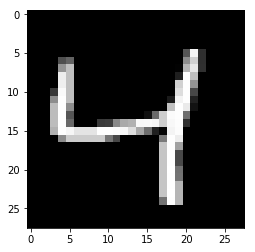

In [19]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [20]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value

image_size = mnist.train.images.shape[1]

inputs_ = tf.placeholder(tf.float32, shape=(None, image_size))
targets_ = tf.placeholder(tf.float32, shape=(None, image_size))

# Output of hidden layer
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits
logits = tf.layers.dense(encoded, image_size, activation=None)
# Sigmoid output from
decoded = tf.nn.sigmoid(logits, name='output')

loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
cost = tf.reduce_mean(loss)
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

## Training

In [21]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [22]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6937
Epoch: 1/20... Training loss: 0.6909
Epoch: 1/20... Training loss: 0.6878
Epoch: 1/20... Training loss: 0.6838
Epoch: 1/20... Training loss: 0.6796
Epoch: 1/20... Training loss: 0.6737
Epoch: 1/20... Training loss: 0.6672
Epoch: 1/20... Training loss: 0.6597
Epoch: 1/20... Training loss: 0.6501
Epoch: 1/20... Training loss: 0.6396
Epoch: 1/20... Training loss: 0.6273
Epoch: 1/20... Training loss: 0.6164
Epoch: 1/20... Training loss: 0.6008
Epoch: 1/20... Training loss: 0.5873
Epoch: 1/20... Training loss: 0.5688
Epoch: 1/20... Training loss: 0.5520
Epoch: 1/20... Training loss: 0.5345
Epoch: 1/20... Training loss: 0.5228
Epoch: 1/20... Training loss: 0.5046
Epoch: 1/20... Training loss: 0.4845
Epoch: 1/20... Training loss: 0.4657
Epoch: 1/20... Training loss: 0.4481
Epoch: 1/20... Training loss: 0.4361
Epoch: 1/20... Training loss: 0.4265
Epoch: 1/20... Training loss: 0.4097
Epoch: 1/20... Training loss: 0.3857
Epoch: 1/20... Training loss: 0.3757
E

Epoch: 1/20... Training loss: 0.1824
Epoch: 1/20... Training loss: 0.1812
Epoch: 1/20... Training loss: 0.1899
Epoch: 1/20... Training loss: 0.1886
Epoch: 1/20... Training loss: 0.1811
Epoch: 1/20... Training loss: 0.1904
Epoch: 1/20... Training loss: 0.1846
Epoch: 1/20... Training loss: 0.1870
Epoch: 1/20... Training loss: 0.1838
Epoch: 1/20... Training loss: 0.1895
Epoch: 1/20... Training loss: 0.1896
Epoch: 1/20... Training loss: 0.1807
Epoch: 1/20... Training loss: 0.1893
Epoch: 1/20... Training loss: 0.1817
Epoch: 1/20... Training loss: 0.1835
Epoch: 1/20... Training loss: 0.1812
Epoch: 1/20... Training loss: 0.1825
Epoch: 1/20... Training loss: 0.1830
Epoch: 1/20... Training loss: 0.1797
Epoch: 1/20... Training loss: 0.1847
Epoch: 1/20... Training loss: 0.1811
Epoch: 1/20... Training loss: 0.1830
Epoch: 1/20... Training loss: 0.1865
Epoch: 1/20... Training loss: 0.1810
Epoch: 1/20... Training loss: 0.1835
Epoch: 1/20... Training loss: 0.1863
Epoch: 1/20... Training loss: 0.1870
E

Epoch: 2/20... Training loss: 0.1552
Epoch: 2/20... Training loss: 0.1575
Epoch: 2/20... Training loss: 0.1576
Epoch: 2/20... Training loss: 0.1552
Epoch: 2/20... Training loss: 0.1468
Epoch: 2/20... Training loss: 0.1531
Epoch: 2/20... Training loss: 0.1550
Epoch: 2/20... Training loss: 0.1518
Epoch: 2/20... Training loss: 0.1573
Epoch: 2/20... Training loss: 0.1534
Epoch: 2/20... Training loss: 0.1565
Epoch: 2/20... Training loss: 0.1530
Epoch: 2/20... Training loss: 0.1546
Epoch: 2/20... Training loss: 0.1596
Epoch: 2/20... Training loss: 0.1481
Epoch: 2/20... Training loss: 0.1501
Epoch: 2/20... Training loss: 0.1476
Epoch: 2/20... Training loss: 0.1567
Epoch: 2/20... Training loss: 0.1520
Epoch: 2/20... Training loss: 0.1531
Epoch: 2/20... Training loss: 0.1525
Epoch: 2/20... Training loss: 0.1563
Epoch: 2/20... Training loss: 0.1502
Epoch: 2/20... Training loss: 0.1547
Epoch: 2/20... Training loss: 0.1547
Epoch: 2/20... Training loss: 0.1568
Epoch: 2/20... Training loss: 0.1542
E

Epoch: 3/20... Training loss: 0.1421
Epoch: 3/20... Training loss: 0.1323
Epoch: 3/20... Training loss: 0.1369
Epoch: 3/20... Training loss: 0.1354
Epoch: 3/20... Training loss: 0.1349
Epoch: 3/20... Training loss: 0.1407
Epoch: 3/20... Training loss: 0.1311
Epoch: 3/20... Training loss: 0.1374
Epoch: 3/20... Training loss: 0.1360
Epoch: 3/20... Training loss: 0.1346
Epoch: 3/20... Training loss: 0.1340
Epoch: 3/20... Training loss: 0.1339
Epoch: 3/20... Training loss: 0.1351
Epoch: 3/20... Training loss: 0.1381
Epoch: 3/20... Training loss: 0.1359
Epoch: 3/20... Training loss: 0.1322
Epoch: 3/20... Training loss: 0.1341
Epoch: 3/20... Training loss: 0.1326
Epoch: 3/20... Training loss: 0.1394
Epoch: 3/20... Training loss: 0.1381
Epoch: 3/20... Training loss: 0.1342
Epoch: 3/20... Training loss: 0.1349
Epoch: 3/20... Training loss: 0.1310
Epoch: 3/20... Training loss: 0.1339
Epoch: 3/20... Training loss: 0.1371
Epoch: 3/20... Training loss: 0.1353
Epoch: 3/20... Training loss: 0.1351
E

Epoch: 4/20... Training loss: 0.1230
Epoch: 4/20... Training loss: 0.1163
Epoch: 4/20... Training loss: 0.1230
Epoch: 4/20... Training loss: 0.1209
Epoch: 4/20... Training loss: 0.1251
Epoch: 4/20... Training loss: 0.1215
Epoch: 4/20... Training loss: 0.1247
Epoch: 4/20... Training loss: 0.1212
Epoch: 4/20... Training loss: 0.1247
Epoch: 4/20... Training loss: 0.1239
Epoch: 4/20... Training loss: 0.1224
Epoch: 4/20... Training loss: 0.1227
Epoch: 4/20... Training loss: 0.1255
Epoch: 4/20... Training loss: 0.1211
Epoch: 4/20... Training loss: 0.1202
Epoch: 4/20... Training loss: 0.1221
Epoch: 4/20... Training loss: 0.1231
Epoch: 4/20... Training loss: 0.1213
Epoch: 4/20... Training loss: 0.1252
Epoch: 4/20... Training loss: 0.1229
Epoch: 4/20... Training loss: 0.1277
Epoch: 4/20... Training loss: 0.1249
Epoch: 4/20... Training loss: 0.1186
Epoch: 4/20... Training loss: 0.1207
Epoch: 4/20... Training loss: 0.1202
Epoch: 4/20... Training loss: 0.1258
Epoch: 4/20... Training loss: 0.1202
E

Epoch: 4/20... Training loss: 0.1138
Epoch: 4/20... Training loss: 0.1131
Epoch: 4/20... Training loss: 0.1149
Epoch: 4/20... Training loss: 0.1149
Epoch: 4/20... Training loss: 0.1186
Epoch: 4/20... Training loss: 0.1151
Epoch: 4/20... Training loss: 0.1156
Epoch: 5/20... Training loss: 0.1142
Epoch: 5/20... Training loss: 0.1146
Epoch: 5/20... Training loss: 0.1144
Epoch: 5/20... Training loss: 0.1135
Epoch: 5/20... Training loss: 0.1151
Epoch: 5/20... Training loss: 0.1140
Epoch: 5/20... Training loss: 0.1138
Epoch: 5/20... Training loss: 0.1148
Epoch: 5/20... Training loss: 0.1162
Epoch: 5/20... Training loss: 0.1119
Epoch: 5/20... Training loss: 0.1153
Epoch: 5/20... Training loss: 0.1137
Epoch: 5/20... Training loss: 0.1166
Epoch: 5/20... Training loss: 0.1136
Epoch: 5/20... Training loss: 0.1113
Epoch: 5/20... Training loss: 0.1167
Epoch: 5/20... Training loss: 0.1116
Epoch: 5/20... Training loss: 0.1152
Epoch: 5/20... Training loss: 0.1144
Epoch: 5/20... Training loss: 0.1140
E

Epoch: 5/20... Training loss: 0.1089
Epoch: 5/20... Training loss: 0.1073
Epoch: 5/20... Training loss: 0.1080
Epoch: 5/20... Training loss: 0.1081
Epoch: 5/20... Training loss: 0.1055
Epoch: 5/20... Training loss: 0.1094
Epoch: 5/20... Training loss: 0.1095
Epoch: 5/20... Training loss: 0.1062
Epoch: 5/20... Training loss: 0.1096
Epoch: 5/20... Training loss: 0.1113
Epoch: 5/20... Training loss: 0.1060
Epoch: 5/20... Training loss: 0.1076
Epoch: 5/20... Training loss: 0.1079
Epoch: 5/20... Training loss: 0.1110
Epoch: 5/20... Training loss: 0.1070
Epoch: 5/20... Training loss: 0.1090
Epoch: 5/20... Training loss: 0.1102
Epoch: 5/20... Training loss: 0.1078
Epoch: 5/20... Training loss: 0.1077
Epoch: 5/20... Training loss: 0.1073
Epoch: 5/20... Training loss: 0.1071
Epoch: 5/20... Training loss: 0.1069
Epoch: 5/20... Training loss: 0.1079
Epoch: 5/20... Training loss: 0.1075
Epoch: 5/20... Training loss: 0.1086
Epoch: 5/20... Training loss: 0.1101
Epoch: 5/20... Training loss: 0.1067
E

Epoch: 6/20... Training loss: 0.1057
Epoch: 6/20... Training loss: 0.1023
Epoch: 6/20... Training loss: 0.1043
Epoch: 6/20... Training loss: 0.1029
Epoch: 6/20... Training loss: 0.1033
Epoch: 6/20... Training loss: 0.1033
Epoch: 6/20... Training loss: 0.1050
Epoch: 6/20... Training loss: 0.1025
Epoch: 6/20... Training loss: 0.1061
Epoch: 6/20... Training loss: 0.1001
Epoch: 6/20... Training loss: 0.1049
Epoch: 6/20... Training loss: 0.1043
Epoch: 6/20... Training loss: 0.1005
Epoch: 6/20... Training loss: 0.0988
Epoch: 6/20... Training loss: 0.0999
Epoch: 6/20... Training loss: 0.1032
Epoch: 6/20... Training loss: 0.1036
Epoch: 6/20... Training loss: 0.1014
Epoch: 6/20... Training loss: 0.1035
Epoch: 6/20... Training loss: 0.1015
Epoch: 6/20... Training loss: 0.1025
Epoch: 6/20... Training loss: 0.1021
Epoch: 6/20... Training loss: 0.1010
Epoch: 6/20... Training loss: 0.1024
Epoch: 6/20... Training loss: 0.1053
Epoch: 6/20... Training loss: 0.1021
Epoch: 6/20... Training loss: 0.0986
E

Epoch: 7/20... Training loss: 0.1022
Epoch: 7/20... Training loss: 0.1020
Epoch: 7/20... Training loss: 0.0992
Epoch: 7/20... Training loss: 0.1014
Epoch: 7/20... Training loss: 0.0994
Epoch: 7/20... Training loss: 0.1018
Epoch: 7/20... Training loss: 0.0982
Epoch: 7/20... Training loss: 0.1007
Epoch: 7/20... Training loss: 0.1012
Epoch: 7/20... Training loss: 0.1012
Epoch: 7/20... Training loss: 0.0992
Epoch: 7/20... Training loss: 0.1025
Epoch: 7/20... Training loss: 0.0982
Epoch: 7/20... Training loss: 0.1019
Epoch: 7/20... Training loss: 0.0991
Epoch: 7/20... Training loss: 0.1021
Epoch: 7/20... Training loss: 0.1016
Epoch: 7/20... Training loss: 0.0990
Epoch: 7/20... Training loss: 0.0983
Epoch: 7/20... Training loss: 0.1030
Epoch: 7/20... Training loss: 0.1028
Epoch: 7/20... Training loss: 0.1001
Epoch: 7/20... Training loss: 0.1034
Epoch: 7/20... Training loss: 0.0991
Epoch: 7/20... Training loss: 0.1013
Epoch: 7/20... Training loss: 0.0986
Epoch: 7/20... Training loss: 0.1004
E

Epoch: 8/20... Training loss: 0.0973
Epoch: 8/20... Training loss: 0.0960
Epoch: 8/20... Training loss: 0.0982
Epoch: 8/20... Training loss: 0.0981
Epoch: 8/20... Training loss: 0.1009
Epoch: 8/20... Training loss: 0.0972
Epoch: 8/20... Training loss: 0.1037
Epoch: 8/20... Training loss: 0.0965
Epoch: 8/20... Training loss: 0.0981
Epoch: 8/20... Training loss: 0.0946
Epoch: 8/20... Training loss: 0.1000
Epoch: 8/20... Training loss: 0.0981
Epoch: 8/20... Training loss: 0.0985
Epoch: 8/20... Training loss: 0.1002
Epoch: 8/20... Training loss: 0.0947
Epoch: 8/20... Training loss: 0.0973
Epoch: 8/20... Training loss: 0.0981
Epoch: 8/20... Training loss: 0.0994
Epoch: 8/20... Training loss: 0.1001
Epoch: 8/20... Training loss: 0.0972
Epoch: 8/20... Training loss: 0.1002
Epoch: 8/20... Training loss: 0.0958
Epoch: 8/20... Training loss: 0.0937
Epoch: 8/20... Training loss: 0.0984
Epoch: 8/20... Training loss: 0.0959
Epoch: 8/20... Training loss: 0.0995
Epoch: 8/20... Training loss: 0.0990
E

Epoch: 8/20... Training loss: 0.0976
Epoch: 8/20... Training loss: 0.0955
Epoch: 8/20... Training loss: 0.0984
Epoch: 8/20... Training loss: 0.0919
Epoch: 8/20... Training loss: 0.0997
Epoch: 8/20... Training loss: 0.0950
Epoch: 8/20... Training loss: 0.0989
Epoch: 8/20... Training loss: 0.0975
Epoch: 8/20... Training loss: 0.0923
Epoch: 8/20... Training loss: 0.0987
Epoch: 8/20... Training loss: 0.1000
Epoch: 8/20... Training loss: 0.0954
Epoch: 8/20... Training loss: 0.0948
Epoch: 8/20... Training loss: 0.0939
Epoch: 8/20... Training loss: 0.1005
Epoch: 8/20... Training loss: 0.0938
Epoch: 8/20... Training loss: 0.0970
Epoch: 8/20... Training loss: 0.0976
Epoch: 8/20... Training loss: 0.0916
Epoch: 8/20... Training loss: 0.0976
Epoch: 8/20... Training loss: 0.0973
Epoch: 8/20... Training loss: 0.0979
Epoch: 8/20... Training loss: 0.0956
Epoch: 9/20... Training loss: 0.0959
Epoch: 9/20... Training loss: 0.0949
Epoch: 9/20... Training loss: 0.0987
Epoch: 9/20... Training loss: 0.0982
E

Epoch: 9/20... Training loss: 0.0965
Epoch: 9/20... Training loss: 0.0926
Epoch: 9/20... Training loss: 0.0966
Epoch: 9/20... Training loss: 0.0954
Epoch: 9/20... Training loss: 0.0967
Epoch: 9/20... Training loss: 0.0952
Epoch: 9/20... Training loss: 0.0960
Epoch: 9/20... Training loss: 0.0949
Epoch: 9/20... Training loss: 0.0978
Epoch: 9/20... Training loss: 0.0933
Epoch: 9/20... Training loss: 0.0959
Epoch: 9/20... Training loss: 0.0977
Epoch: 9/20... Training loss: 0.0957
Epoch: 9/20... Training loss: 0.0946
Epoch: 9/20... Training loss: 0.0984
Epoch: 9/20... Training loss: 0.0954
Epoch: 9/20... Training loss: 0.0953
Epoch: 9/20... Training loss: 0.0992
Epoch: 9/20... Training loss: 0.0969
Epoch: 9/20... Training loss: 0.0974
Epoch: 9/20... Training loss: 0.0930
Epoch: 9/20... Training loss: 0.0942
Epoch: 9/20... Training loss: 0.0990
Epoch: 9/20... Training loss: 0.0954
Epoch: 9/20... Training loss: 0.0935
Epoch: 9/20... Training loss: 0.0966
Epoch: 9/20... Training loss: 0.0945
E

Epoch: 10/20... Training loss: 0.0963
Epoch: 10/20... Training loss: 0.0946
Epoch: 10/20... Training loss: 0.0976
Epoch: 10/20... Training loss: 0.0963
Epoch: 10/20... Training loss: 0.0943
Epoch: 10/20... Training loss: 0.0972
Epoch: 10/20... Training loss: 0.0948
Epoch: 10/20... Training loss: 0.0936
Epoch: 10/20... Training loss: 0.0926
Epoch: 10/20... Training loss: 0.0989
Epoch: 10/20... Training loss: 0.0960
Epoch: 10/20... Training loss: 0.0938
Epoch: 10/20... Training loss: 0.0959
Epoch: 10/20... Training loss: 0.0971
Epoch: 10/20... Training loss: 0.0973
Epoch: 10/20... Training loss: 0.0968
Epoch: 10/20... Training loss: 0.0968
Epoch: 10/20... Training loss: 0.0978
Epoch: 10/20... Training loss: 0.0954
Epoch: 10/20... Training loss: 0.0933
Epoch: 10/20... Training loss: 0.0934
Epoch: 10/20... Training loss: 0.0955
Epoch: 10/20... Training loss: 0.0943
Epoch: 10/20... Training loss: 0.0957
Epoch: 10/20... Training loss: 0.0973
Epoch: 10/20... Training loss: 0.0958
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0978
Epoch: 11/20... Training loss: 0.0946
Epoch: 11/20... Training loss: 0.0969
Epoch: 11/20... Training loss: 0.0950
Epoch: 11/20... Training loss: 0.0957
Epoch: 11/20... Training loss: 0.0916
Epoch: 11/20... Training loss: 0.0947
Epoch: 11/20... Training loss: 0.0937
Epoch: 11/20... Training loss: 0.0942
Epoch: 11/20... Training loss: 0.0949
Epoch: 11/20... Training loss: 0.0933
Epoch: 11/20... Training loss: 0.0944
Epoch: 11/20... Training loss: 0.0944
Epoch: 11/20... Training loss: 0.0921
Epoch: 11/20... Training loss: 0.0938
Epoch: 11/20... Training loss: 0.0933
Epoch: 11/20... Training loss: 0.0959
Epoch: 11/20... Training loss: 0.0919
Epoch: 11/20... Training loss: 0.0928
Epoch: 11/20... Training loss: 0.0930
Epoch: 11/20... Training loss: 0.0940
Epoch: 11/20... Training loss: 0.0934
Epoch: 11/20... Training loss: 0.0954
Epoch: 11/20... Training loss: 0.0933
Epoch: 11/20... Training loss: 0.0973
Epoch: 11/20... Training loss: 0.0966
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0977
Epoch: 12/20... Training loss: 0.0968
Epoch: 12/20... Training loss: 0.0982
Epoch: 12/20... Training loss: 0.0953
Epoch: 12/20... Training loss: 0.0952
Epoch: 12/20... Training loss: 0.0942
Epoch: 12/20... Training loss: 0.0925
Epoch: 12/20... Training loss: 0.0955
Epoch: 12/20... Training loss: 0.0938
Epoch: 12/20... Training loss: 0.0968
Epoch: 12/20... Training loss: 0.0908
Epoch: 12/20... Training loss: 0.0976
Epoch: 12/20... Training loss: 0.0942
Epoch: 12/20... Training loss: 0.0922
Epoch: 12/20... Training loss: 0.0949
Epoch: 12/20... Training loss: 0.0920
Epoch: 12/20... Training loss: 0.0916
Epoch: 12/20... Training loss: 0.0921
Epoch: 12/20... Training loss: 0.0928
Epoch: 12/20... Training loss: 0.0939
Epoch: 12/20... Training loss: 0.0926
Epoch: 12/20... Training loss: 0.0930
Epoch: 12/20... Training loss: 0.0935
Epoch: 12/20... Training loss: 0.0955
Epoch: 12/20... Training loss: 0.0955
Epoch: 12/20... Training loss: 0.0966
Epoch: 12/20

Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20... Training loss: 0.0956
Epoch: 12/20... Training loss: 0.0968
Epoch: 12/20... Training loss: 0.0965
Epoch: 12/20... Training loss: 0.0930
Epoch: 12/20... Training loss: 0.0946
Epoch: 12/20... Training loss: 0.0919
Epoch: 12/20... Training loss: 0.0955
Epoch: 12/20... Training loss: 0.1003
Epoch: 12/20... Training loss: 0.0934
Epoch: 12/20... Training loss: 0.0898
Epoch: 12/20... Training loss: 0.0925
Epoch: 12/20... Training loss: 0.0953
Epoch: 12/20... Training loss: 0.0932
Epoch: 12/20... Training loss: 0.0958
Epoch: 12/20... Training loss: 0.0933
Epoch: 12/20... Training loss: 0.0918
Epoch: 12/20... Training loss: 0.0912
Epoch: 12/20... Training loss: 0.0952
Epoch: 12/20... Training loss: 0.0932
Epoch: 12/20... Training loss: 0.0903
Epoch: 12/20... Training loss: 0.0940
Epoch: 12/20... Training loss: 0.0936
Epoch: 12/20... Training loss: 0.0937
Epoch: 12/20... Training loss: 0.0964
Epoch: 12/20... Training loss: 0.0929
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0961
Epoch: 13/20... Training loss: 0.0929
Epoch: 13/20... Training loss: 0.0922
Epoch: 13/20... Training loss: 0.0928
Epoch: 13/20... Training loss: 0.0937
Epoch: 13/20... Training loss: 0.0947
Epoch: 13/20... Training loss: 0.0926
Epoch: 13/20... Training loss: 0.0937
Epoch: 13/20... Training loss: 0.0969
Epoch: 13/20... Training loss: 0.0961
Epoch: 13/20... Training loss: 0.0939
Epoch: 13/20... Training loss: 0.0925
Epoch: 13/20... Training loss: 0.0935
Epoch: 13/20... Training loss: 0.0921
Epoch: 13/20... Training loss: 0.0942
Epoch: 13/20... Training loss: 0.0976
Epoch: 13/20... Training loss: 0.0946
Epoch: 13/20... Training loss: 0.0953
Epoch: 13/20... Training loss: 0.0933
Epoch: 13/20... Training loss: 0.0985
Epoch: 13/20... Training loss: 0.0897
Epoch: 13/20... Training loss: 0.0953
Epoch: 13/20... Training loss: 0.0916
Epoch: 13/20... Training loss: 0.0944
Epoch: 13/20... Training loss: 0.0974
Epoch: 13/20... Training loss: 0.0938
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0927
Epoch: 14/20... Training loss: 0.0941
Epoch: 14/20... Training loss: 0.0977
Epoch: 14/20... Training loss: 0.0950
Epoch: 14/20... Training loss: 0.0966
Epoch: 14/20... Training loss: 0.0927
Epoch: 14/20... Training loss: 0.0953
Epoch: 14/20... Training loss: 0.0955
Epoch: 14/20... Training loss: 0.0916
Epoch: 14/20... Training loss: 0.0949
Epoch: 14/20... Training loss: 0.0922
Epoch: 14/20... Training loss: 0.0936
Epoch: 14/20... Training loss: 0.0951
Epoch: 14/20... Training loss: 0.0909
Epoch: 14/20... Training loss: 0.0929
Epoch: 14/20... Training loss: 0.0978
Epoch: 14/20... Training loss: 0.0942
Epoch: 14/20... Training loss: 0.0925
Epoch: 14/20... Training loss: 0.0976
Epoch: 14/20... Training loss: 0.0931
Epoch: 14/20... Training loss: 0.0921
Epoch: 14/20... Training loss: 0.0954
Epoch: 14/20... Training loss: 0.0966
Epoch: 14/20... Training loss: 0.0986
Epoch: 14/20... Training loss: 0.0916
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0968
Epoch: 15/20... Training loss: 0.0954
Epoch: 15/20... Training loss: 0.0912
Epoch: 15/20... Training loss: 0.0956
Epoch: 15/20... Training loss: 0.0927
Epoch: 15/20... Training loss: 0.0920
Epoch: 15/20... Training loss: 0.0917
Epoch: 15/20... Training loss: 0.0940
Epoch: 15/20... Training loss: 0.0912
Epoch: 15/20... Training loss: 0.0947
Epoch: 15/20... Training loss: 0.0894
Epoch: 15/20... Training loss: 0.0933
Epoch: 15/20... Training loss: 0.0930
Epoch: 15/20... Training loss: 0.0886
Epoch: 15/20... Training loss: 0.0925
Epoch: 15/20... Training loss: 0.0916
Epoch: 15/20... Training loss: 0.0927
Epoch: 15/20... Training loss: 0.0919
Epoch: 15/20... Training loss: 0.0925
Epoch: 15/20... Training loss: 0.0929
Epoch: 15/20... Training loss: 0.0924
Epoch: 15/20... Training loss: 0.0899
Epoch: 15/20... Training loss: 0.0941
Epoch: 15/20... Training loss: 0.0956
Epoch: 15/20... Training loss: 0.0929
Epoch: 15/20... Training loss: 0.0955
Epoch: 15/20

Epoch: 15/20... Training loss: 0.0932
Epoch: 15/20... Training loss: 0.0975
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20... Training loss: 0.0935
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20... Training loss: 0.0929
Epoch: 15/20... Training loss: 0.0955
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20... Training loss: 0.0927
Epoch: 15/20... Training loss: 0.0959
Epoch: 15/20... Training loss: 0.0902
Epoch: 15/20... Training loss: 0.0931
Epoch: 15/20... Training loss: 0.0968
Epoch: 15/20... Training loss: 0.0926
Epoch: 15/20... Training loss: 0.0936
Epoch: 15/20... Training loss: 0.0929
Epoch: 15/20... Training loss: 0.0972
Epoch: 15/20... Training loss: 0.0910
Epoch: 15/20... Training loss: 0.0951
Epoch: 15/20... Training loss: 0.0951
Epoch: 16/20... Training loss: 0.0954
Epoch: 16/20... Training loss: 0.0934
Epoch: 16/20... Training loss: 0.0963
Epoch: 16/20... Training loss: 0.0920
Epoch: 16/20... Training loss: 0.0970
Epoch: 16/20... Training loss: 0.0945
Epoch: 16/20

Epoch: 16/20... Training loss: 0.0953
Epoch: 16/20... Training loss: 0.0948
Epoch: 16/20... Training loss: 0.0924
Epoch: 16/20... Training loss: 0.0900
Epoch: 16/20... Training loss: 0.0920
Epoch: 16/20... Training loss: 0.0931
Epoch: 16/20... Training loss: 0.0947
Epoch: 16/20... Training loss: 0.0931
Epoch: 16/20... Training loss: 0.0966
Epoch: 16/20... Training loss: 0.0945
Epoch: 16/20... Training loss: 0.0944
Epoch: 16/20... Training loss: 0.0954
Epoch: 16/20... Training loss: 0.0931
Epoch: 16/20... Training loss: 0.0960
Epoch: 16/20... Training loss: 0.0967
Epoch: 16/20... Training loss: 0.0952
Epoch: 16/20... Training loss: 0.0898
Epoch: 16/20... Training loss: 0.0919
Epoch: 16/20... Training loss: 0.0963
Epoch: 16/20... Training loss: 0.0927
Epoch: 16/20... Training loss: 0.0943
Epoch: 16/20... Training loss: 0.0915
Epoch: 16/20... Training loss: 0.0924
Epoch: 16/20... Training loss: 0.0939
Epoch: 16/20... Training loss: 0.0943
Epoch: 16/20... Training loss: 0.0970
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0944
Epoch: 17/20... Training loss: 0.0943
Epoch: 17/20... Training loss: 0.0909
Epoch: 17/20... Training loss: 0.0927
Epoch: 17/20... Training loss: 0.0948
Epoch: 17/20... Training loss: 0.0961
Epoch: 17/20... Training loss: 0.0940
Epoch: 17/20... Training loss: 0.0910
Epoch: 17/20... Training loss: 0.0916
Epoch: 17/20... Training loss: 0.0925
Epoch: 17/20... Training loss: 0.0937
Epoch: 17/20... Training loss: 0.0920
Epoch: 17/20... Training loss: 0.0994
Epoch: 17/20... Training loss: 0.0935
Epoch: 17/20... Training loss: 0.0906
Epoch: 17/20... Training loss: 0.0929
Epoch: 17/20... Training loss: 0.0939
Epoch: 17/20... Training loss: 0.0938
Epoch: 17/20... Training loss: 0.0967
Epoch: 17/20... Training loss: 0.0934
Epoch: 17/20... Training loss: 0.0962
Epoch: 17/20... Training loss: 0.0920
Epoch: 17/20... Training loss: 0.0944
Epoch: 17/20... Training loss: 0.0964
Epoch: 17/20... Training loss: 0.0899
Epoch: 17/20... Training loss: 0.0900
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0920
Epoch: 18/20... Training loss: 0.0911
Epoch: 18/20... Training loss: 0.0950
Epoch: 18/20... Training loss: 0.0947
Epoch: 18/20... Training loss: 0.0899
Epoch: 18/20... Training loss: 0.0964
Epoch: 18/20... Training loss: 0.0926
Epoch: 18/20... Training loss: 0.0940
Epoch: 18/20... Training loss: 0.0928
Epoch: 18/20... Training loss: 0.0957
Epoch: 18/20... Training loss: 0.0943
Epoch: 18/20... Training loss: 0.0950
Epoch: 18/20... Training loss: 0.0941
Epoch: 18/20... Training loss: 0.0940
Epoch: 18/20... Training loss: 0.0915
Epoch: 18/20... Training loss: 0.0949
Epoch: 18/20... Training loss: 0.0948
Epoch: 18/20... Training loss: 0.0906
Epoch: 18/20... Training loss: 0.0973
Epoch: 18/20... Training loss: 0.0919
Epoch: 18/20... Training loss: 0.0899
Epoch: 18/20... Training loss: 0.0945
Epoch: 18/20... Training loss: 0.0951
Epoch: 18/20... Training loss: 0.0963
Epoch: 18/20... Training loss: 0.0941
Epoch: 18/20... Training loss: 0.0921
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0925
Epoch: 19/20... Training loss: 0.0881
Epoch: 19/20... Training loss: 0.0897
Epoch: 19/20... Training loss: 0.0936
Epoch: 19/20... Training loss: 0.0942
Epoch: 19/20... Training loss: 0.0923
Epoch: 19/20... Training loss: 0.0936
Epoch: 19/20... Training loss: 0.0920
Epoch: 19/20... Training loss: 0.0962
Epoch: 19/20... Training loss: 0.0914
Epoch: 19/20... Training loss: 0.0936
Epoch: 19/20... Training loss: 0.0954
Epoch: 19/20... Training loss: 0.0934
Epoch: 19/20... Training loss: 0.0969
Epoch: 19/20... Training loss: 0.0980
Epoch: 19/20... Training loss: 0.0937
Epoch: 19/20... Training loss: 0.0936
Epoch: 19/20... Training loss: 0.0959
Epoch: 19/20... Training loss: 0.0942
Epoch: 19/20... Training loss: 0.0935
Epoch: 19/20... Training loss: 0.0931
Epoch: 19/20... Training loss: 0.0929
Epoch: 19/20... Training loss: 0.0928
Epoch: 19/20... Training loss: 0.0931
Epoch: 19/20... Training loss: 0.0919
Epoch: 19/20... Training loss: 0.0938
Epoch: 19/20

Epoch: 19/20... Training loss: 0.0923
Epoch: 19/20... Training loss: 0.0944
Epoch: 19/20... Training loss: 0.0928
Epoch: 19/20... Training loss: 0.0936
Epoch: 19/20... Training loss: 0.0907
Epoch: 19/20... Training loss: 0.0980
Epoch: 19/20... Training loss: 0.0926
Epoch: 19/20... Training loss: 0.0915
Epoch: 19/20... Training loss: 0.0892
Epoch: 19/20... Training loss: 0.0940
Epoch: 19/20... Training loss: 0.0933
Epoch: 19/20... Training loss: 0.0871
Epoch: 19/20... Training loss: 0.0961
Epoch: 19/20... Training loss: 0.0916
Epoch: 19/20... Training loss: 0.0930
Epoch: 19/20... Training loss: 0.0917
Epoch: 19/20... Training loss: 0.0940
Epoch: 19/20... Training loss: 0.0935
Epoch: 19/20... Training loss: 0.0956
Epoch: 19/20... Training loss: 0.0942
Epoch: 19/20... Training loss: 0.0921
Epoch: 19/20... Training loss: 0.0942
Epoch: 19/20... Training loss: 0.0920
Epoch: 19/20... Training loss: 0.0949
Epoch: 19/20... Training loss: 0.0944
Epoch: 19/20... Training loss: 0.0894
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0941
Epoch: 20/20... Training loss: 0.0973
Epoch: 20/20... Training loss: 0.0910
Epoch: 20/20... Training loss: 0.0931
Epoch: 20/20... Training loss: 0.0943
Epoch: 20/20... Training loss: 0.0929
Epoch: 20/20... Training loss: 0.0920
Epoch: 20/20... Training loss: 0.0937
Epoch: 20/20... Training loss: 0.0938
Epoch: 20/20... Training loss: 0.0924
Epoch: 20/20... Training loss: 0.0932
Epoch: 20/20... Training loss: 0.0952
Epoch: 20/20... Training loss: 0.0913
Epoch: 20/20... Training loss: 0.0909
Epoch: 20/20... Training loss: 0.0918
Epoch: 20/20... Training loss: 0.0932
Epoch: 20/20... Training loss: 0.0903
Epoch: 20/20... Training loss: 0.0916
Epoch: 20/20... Training loss: 0.0943
Epoch: 20/20... Training loss: 0.0949
Epoch: 20/20... Training loss: 0.0943
Epoch: 20/20... Training loss: 0.0931
Epoch: 20/20... Training loss: 0.0949
Epoch: 20/20... Training loss: 0.0935
Epoch: 20/20... Training loss: 0.0965
Epoch: 20/20... Training loss: 0.0914
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

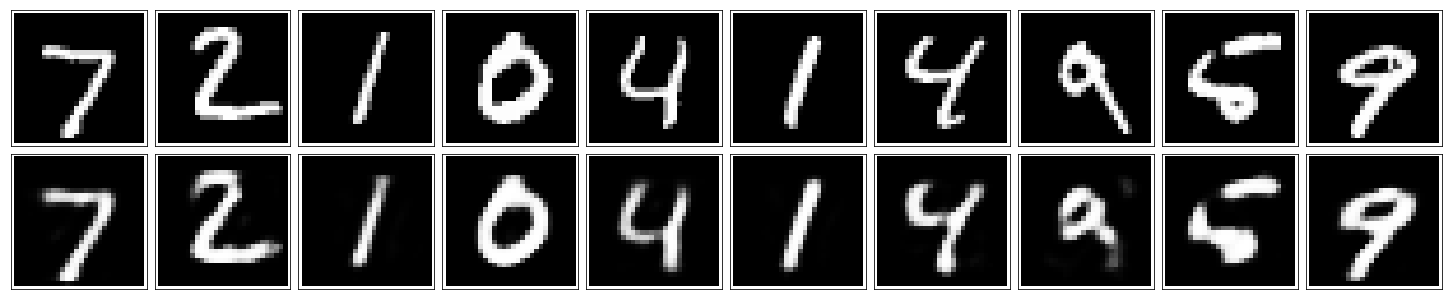

In [23]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [25]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.